# Testing a FaceSwap Deep Fake attack on a VGGFace classifier

This notebook tests applies static image (frame-by-frame) face detection for speaker re-identification in videos and demostrates that state of the art face detection techniques are deceived by fake videos that use face swapping techniques. Reference for VGG model implementation in Python: https://github.com/rcmalli/keras-vggface

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import dlib
import cv2
from keras.preprocessing import image
from keras_vggface import utils
from keras_vggface.vggface import VGGFace
import imutils
import utils.pre_proc_utils as utilities
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure



Using TensorFlow backend.


## Speaker Identification using VGGFace classifier on a FakeVideo

The following scrip extracts the frames of two videos: 
- **Video 1**: Actress impersonating Hillary Clinton
- **Video 2**: Modified version of Video 1 using face swapping technique to put a 'mask' of Hillary Clinton's face over the impersonator's face. 

When the script is run it randomly samples frames from both videos. In the case of Video 2, most of the times the classifier is tricked into thinking the speaker is Hillary Clinton. This demostrates how classifiers that rely on facial features are vulnerable to 'Face Swaping' techniques. 

In [4]:
# Initialize VGGFace Model with resnet50 architecture (State of the art as of 2017)
model = VGGFace(model='resnet50')

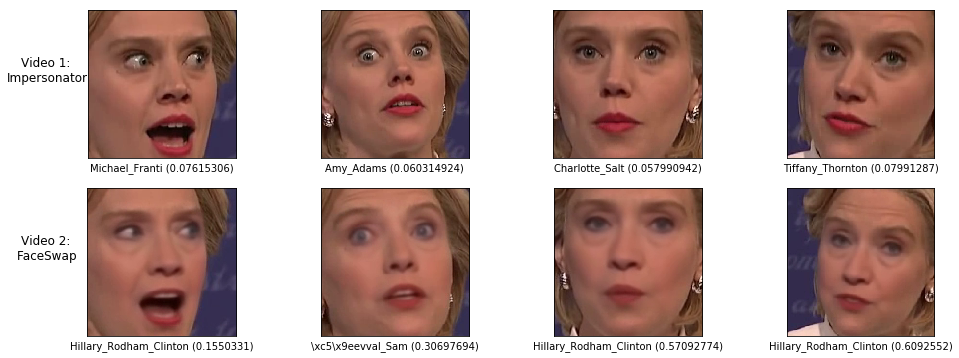

In [7]:
# ---SHOW IMPOSTOR VS. FACESWAP

# Sample random frames
sample_size=4
no_frames=min(impostor_frames.shape[0],faceswap_frames.shape[0])
sample_index=np.random.randint(no_frames, size=(sample_size,))
sample_imp_frames=[]
sample_fs_frames=[]


f, ax= plt.subplots(2,sample_size)

ax[:,0][0].set_ylabel('Video 1: \nImpersonator', rotation=0, size='large')
ax[:,0][1].set_ylabel('Video 2: \nFaceSwap', rotation=0, size='large')
ax[:,0][0].yaxis.labelpad = 40
ax[:,0][1].yaxis.labelpad = 40
f.set_size_inches(16, 6)



detector = dlib.get_frontal_face_detector()


for i in range(sample_size):
    
    
    # Impostor - Exctract face from frame
    impostor_image=impostor_frames[sample_index[i]]
    gray = cv2.cvtColor(impostor_image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)

    right=int(rects[0].left())
    left=int(rects[0].right())
    top=int(rects[0].top())
    bottom=int(rects[0].bottom())
    
    impostor_image=impostor_image[top:bottom,right:left,:]
    sample_imp_frames.append(impostor_image)
    
    # FaceSwap - Exctract face from frame
    faceswap_image=faceswap_frames[sample_index[i]]
    gray = cv2.cvtColor(faceswap_image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)

    right=int(rects[0].left())
    left=int(rects[0].right())
    top=int(rects[0].top())
    bottom=int(rects[0].bottom())
    
    faceswap_image=faceswap_image[top:bottom,right:left,:]
    sample_fs_frames.append(faceswap_image)
    
    # Classify Impostor
    impostor_frames_i=np.array(sample_imp_frames[i],dtype=np.float64)
    impostor_frames_i = cv2.resize(impostor_frames_i, dsize=(224,224))
    impostor_frames_i = np.expand_dims(impostor_frames_i, axis=0)
    preds_imp = model.predict(impostor_frames_i)
    preds_imp=utils.decode_predictions(preds_imp)

    # Classify FaceSwap
    faceswap_frames_i=np.array(sample_fs_frames[i],dtype=np.float64)
    faceswap_frames_i = cv2.resize(faceswap_frames_i, dsize=(224,224))
    faceswap_frames_i = np.expand_dims(faceswap_frames_i, axis=0)
    preds_fs = model.predict(faceswap_frames_i)
    preds_fs=utils.decode_predictions(preds_fs)
 
    
    # Plot each frame sampled
    impostor_image=cv2.cvtColor(sample_imp_frames[i], cv2.COLOR_BGR2RGB)
    faceswap_image=cv2.cvtColor(sample_fs_frames[i], cv2.COLOR_BGR2RGB)
    
    ax[0,i].imshow(impostor_image)
    ax[1,i].imshow(faceswap_image)
    
    # Format Plots
    ax[:,i][0].set_yticks([])
    ax[:,i][0].set_xticks([])
    ax[:,i][1].set_yticks([])
    ax[:,i][1].set_xticks([])
    
    # Add Classifications and Softmax values
    ax[:,i][0].set_xlabel(preds_imp[0][0][0][3:-1]+" ("+str(preds_imp[0][0][1])+")")
    ax[:,i][1].set_xlabel(preds_fs[0][0][0][3:-1]+" ("+str(preds_fs[0][0][1])+")")
    
    
   
    
    






In [ ]:
# ----PERFORM IDENTIFICATION USING 
# -Get Frames

start=time.time()
impostor_video='/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/masters_usa/MIMS/2019-I/cs282_deep_neural_networks/assignments/project/cs282/models/raw_pixels/test_vid/f205q1XQs78_0.mp4'
impostor_frames=utilities.video_to_frame(impostor_video)
end=time.time()
print('Duration:{}'.format(end-start))